# Spam Message

In [1]:
#python libraraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('spam.tsv',sep='\t') #laoded data

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.isna().sum() #no missing values

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
df.describe()


,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [6]:
df['label'].value_counts() #imbalanced dataset

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
ham=df[df['label']=='ham']
spam=df[df['label']=='spam']

In [8]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [9]:
ham=ham.sample(spam.shape[0])

In [10]:
ham.shape, spam.shape # balanced dataset

((747, 4), (747, 4))

In [11]:
data=ham.append(spam, ignore_index=True)

C:\Users\ashok\AppData\Local\Temp\ipykernel_4532\268638927.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=ham.append(spam, ignore_index=True)


In [12]:
data.shape

(1494, 4)

In [13]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [14]:
data.head()

,label,message,length,punct
0,ham,What you need. You have a person to give na.,44,2
1,ham,The length is e same but e top shorter n i got...,123,5
2,ham,"Nah man, my car is meant to be crammed full of...",53,1
3,ham,Good morning. At the repair shop--the ONLY rea...,70,5
4,ham,Really good:)dhanush rocks once again:),39,4


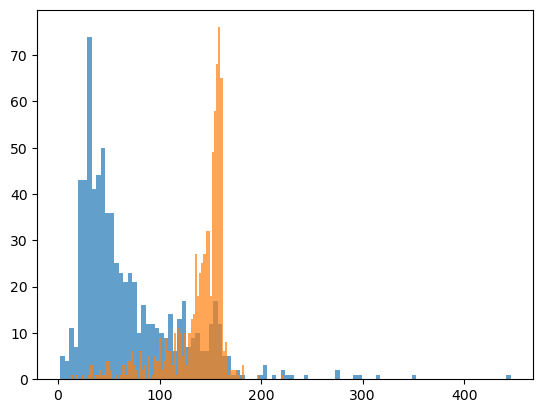

In [15]:
plt.hist(data[data['label']=='ham']['length'], bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['length'], bins=100, alpha=0.7)
plt.show()

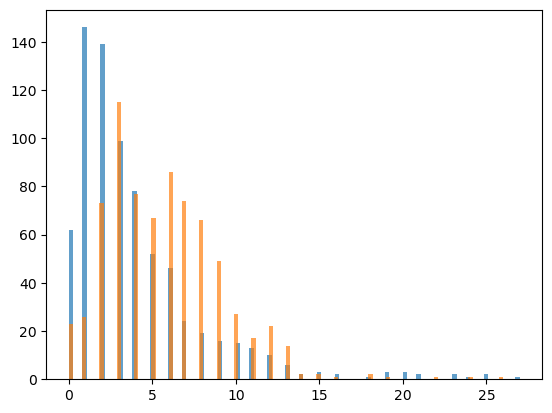

In [16]:
plt.hist(data[data['label']=='ham']['punct'], bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'], bins=100, alpha=0.7)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test =  train_test_split(data['message'], data['label'], test_size = 0.3, random_state =0, shuffle = True)

In [19]:
X_train.shape

(1045,)

In [20]:
X_test.shape

(449,)

In [21]:
y_test.shape

(449,)

In [22]:
y_train.shape

(1045,)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


In [24]:
classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=100))])

In [25]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [26]:
y_pred=classifier.predict(X_test)

In [27]:
y_pred

array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
       'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
       'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
       'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
       'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam',
       'spam', 'ham', 'spam', 'ham', 'ham',

In [28]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [29]:
accuracy_score(y_test, y_pred)

0.9510022271714922

In [30]:
confusion_matrix(y_test, y_pred)

array([[226,   1],
       [ 21, 201]], dtype=int64)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       227
        spam       1.00      0.91      0.95       222

    accuracy                           0.95       449
   macro avg       0.96      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [32]:
from sklearn.svm import SVC

In [33]:
svm = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", SVC(C = 100, gamma='auto'))])

In [34]:
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [35]:
y_pred=svm.predict(X_test)

In [36]:
y_pred

array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
       'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
       'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
       'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
       'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
       'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam',
       'spam', 'spam', 'spam', 'ham', 'sp

In [37]:
accuracy_score(y_test, y_pred)

0.9443207126948775

In [38]:
confusion_matrix(y_test, y_pred)

array([[218,   9],
       [ 16, 206]], dtype=int64)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.96      0.95       227
        spam       0.96      0.93      0.94       222

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [40]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [41]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [42]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
